## Домашнее задание к лекции «Задачи классификации и кластеризации»

* Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
* Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
* Разделите данные на выборку для обучения и тестирования
* Постройте модель LDA
* Визуализируйте предсказания для тестовой выборки и центры классов
* Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
* Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
#Для оформления
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
iris = load_iris()
#print(iris.DESCR)
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','1','2'])[['sepal_length','sepal_width']]
data_class = iris.target
data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [21]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['sepal_length','sepal_width']], data_class, test_size=0.25)

In [22]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# обучаем данные
lda.fit(X_train, y_train)
# делаем прогноз на тестовой выборке
lda.predict(X_test)
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.head()

,0,1
0,0,0
1,2,1
2,0,0
3,2,2
4,0,0


In [23]:
# расчитываем метрику точности
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7894736842105263

In [24]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-6.4141191 ,  8.35608617],
       [ 2.38187403, -4.40636083],
       [ 4.76543155, -4.5383302 ]])

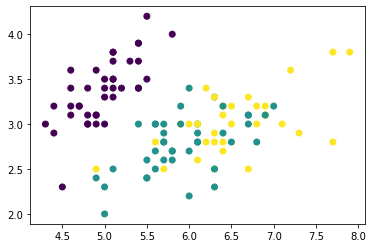

In [25]:
# визуализируем дискриминантную линию
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)
plt.show()

In [26]:
# посмотрим на наши центроиды
lda.means_

array([[4.97948718, 3.37692308],
       [5.93658537, 2.78536585],
       [6.534375  , 3.0125    ]])

<ipython-input-27-e334ae77526c>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, c, cmap='red_blue_classes',


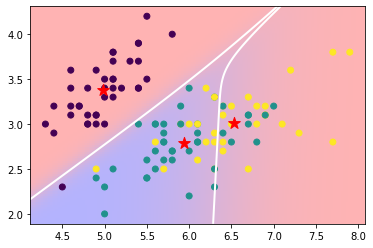

In [27]:
# сам scatter plot
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
c = Z[:, 1].reshape(xx.shape)
c0 = Z[:, 0].reshape(xx.shape)
c2 = Z[:, 2].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, c, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, c0, [0.5], linewidths=2., colors='white')
plt.contour(xx, yy, c2, [0.5], linewidths=2., colors='white')

## Кластеризация

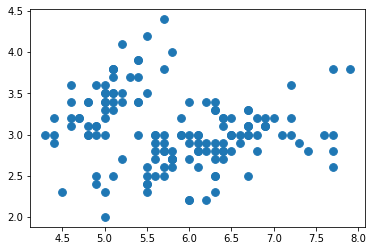

In [28]:
plt.scatter(data['sepal_length'], data['sepal_width'], cmap='autumn', s=60)

In [29]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

Пробуем обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [31]:
# fit-transform сразу обучается и преобразует данные
scaler.fit(X_train)
X_scaled = scaler.transform(X_test)

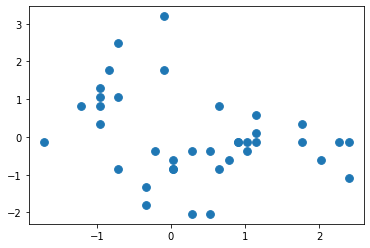

In [32]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [33]:
from sklearn.cluster import KMeans

In [34]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

C:\Users\WNick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


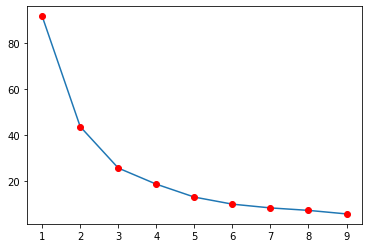

In [35]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

График локтя дает подсказку, что для данного набора данных лучше всего подход разделение на 3 кластера

In [36]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1, 2, 1])

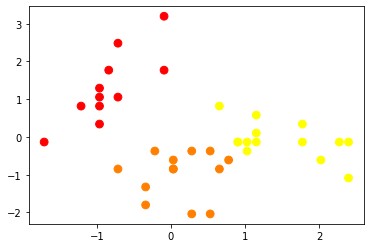

In [37]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)